In [21]:
#monte carlo simulation with metropolis algorithm
#mc method that's biased towards a low energy level


import random
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd
import math
from scipy.stats import gaussian_kde


#constants and conversion factors ========================================

#convert electron volts (eV) to joules
EV_2_JOULES = 1.60218*10**(-19) 

#convert atomic mass unit to kg - used to get bond force constant k 
AMU_2_KG = 1.66054*10**(-27)

#boltzmann constant - used to compare probabilities in metropolis algorithm 
KB = 1.38064852*10**(-23) #(m^2*kg)/(s^2*K)

#speed of light - used to calculate frequency from wavelength 
C = 299792458 # m / s


#zero point energy of H2 - used to get bond force constant k 
# ZERO_POINT_ENERGY_H2 = 0.26 #eV

#planck's constant - used to get bond force constant k  
# H_PLANCK = 6.62607004*10**(-34) #m^2 * kg / s


#Get inputs for ============================================================
    #temperature (kelvin)
    #number of iterations
    #mass of atoms 

T = 1000; #temperature (K)
n = 10000; #iterations 
m1 = 1.00784; #mass of H atom in amu 
m2 = 1.00784; #mass of H atom in amu 
L = 434200 #Wavenumber of H2 molecule -  m^-1

#convert mass of atoms to kg 
m1 *= AMU_2_KG
m2 *= AMU_2_KG


#calculate reduced mass and bond force constant ==============================

#reduced mass - used to get bond force constant k
m_r = (m1*m2)/(m1+m2) #units of kg

v = L*C #gives linear frequency in s^-1
w = 2*math.pi*v #gives angular frequency in s^-1
k = (w**2)*m_r #bond foce constant - units of kg/(s^2)


#other method to calculate k ================================================

#bond force constant - units: kg/(s^2)
# k = ((((ZERO_POINT_ENERGY_H2 * 2)*EV_2_JOULES) / (H_PLANCK))**2)*m_r


#helpful functions ===========================================================

def calc_E(x): #calculate energy given a bond length (units of eV)
    a = x
    a *=(10**(-10)) #convert x of angstroms to meters 
    return (0.5*k*a**2)/(EV_2_JOULES) #convert joules to eV

# ============================================================================


#random values for MC metropolis algorithm 
random.seed()
x_range_start = np.arange(-3,3.01,0.01) #random start position 
x_range_move = np.arange(-2.0,2.01,0.01) #random move addition 
a = np.arange(0,1.0001,0.0001) #random value for probability comparison in metropolis algorithm 
x0 = random.choice(x_range_start) #select random bond length in range [-10,10] angstroms
e0 = calc_E(x0)


#Create datatable of length and corresponding energy at each iteration ========
df = {'Length (Angstrom)': [x0], 'Energy (eV)': [e0]}
df = pd.DataFrame(df)


In [22]:
#Monte Carlo Metropolis algorithm 

for i in range(n):
    
#     print(str(i))
    
    xi = x0 + random.choice(x_range_move) #random move
    ei = calc_E(xi) #energy at random move

    if(ei <= e0): #if energy at random move less than original energy, move there 
        
        df.loc[i+1] = [xi,ei]
        x0 = xi
        e0 = ei
        
#         print("ei  = " + str(ei))
#         print("e0 = " + str(e0))
#         print("=====move to ei")

    else: #if energy at random move greater than original energy, check if less than a random probability between 0 and 1 
        
        p1 = random.choice(a)
        p2 = math.exp((-((ei)-(e0))*(EV_2_JOULES))/((KB)*(T))) #TODO: understand this 
              
        
#         print("P1 " + str(p1))
#         print("P2 " + str(p2))
#         print("ei  = " + str(ei))
#         print("e0 = " + str(e0))
#         print("===============")
        
        
        if(p2>p1): #if probability of step is greater than random probability between 0 and 1 move
            df.loc[i+1] = [xi,ei]
            x0 = xi
            e0 = ei
#             print("here")
        else: #else if probability of step less than random 0 to 1 probability, stay in same position 
            df.loc[i+1] = [x0,e0]

# print(df.to_string())

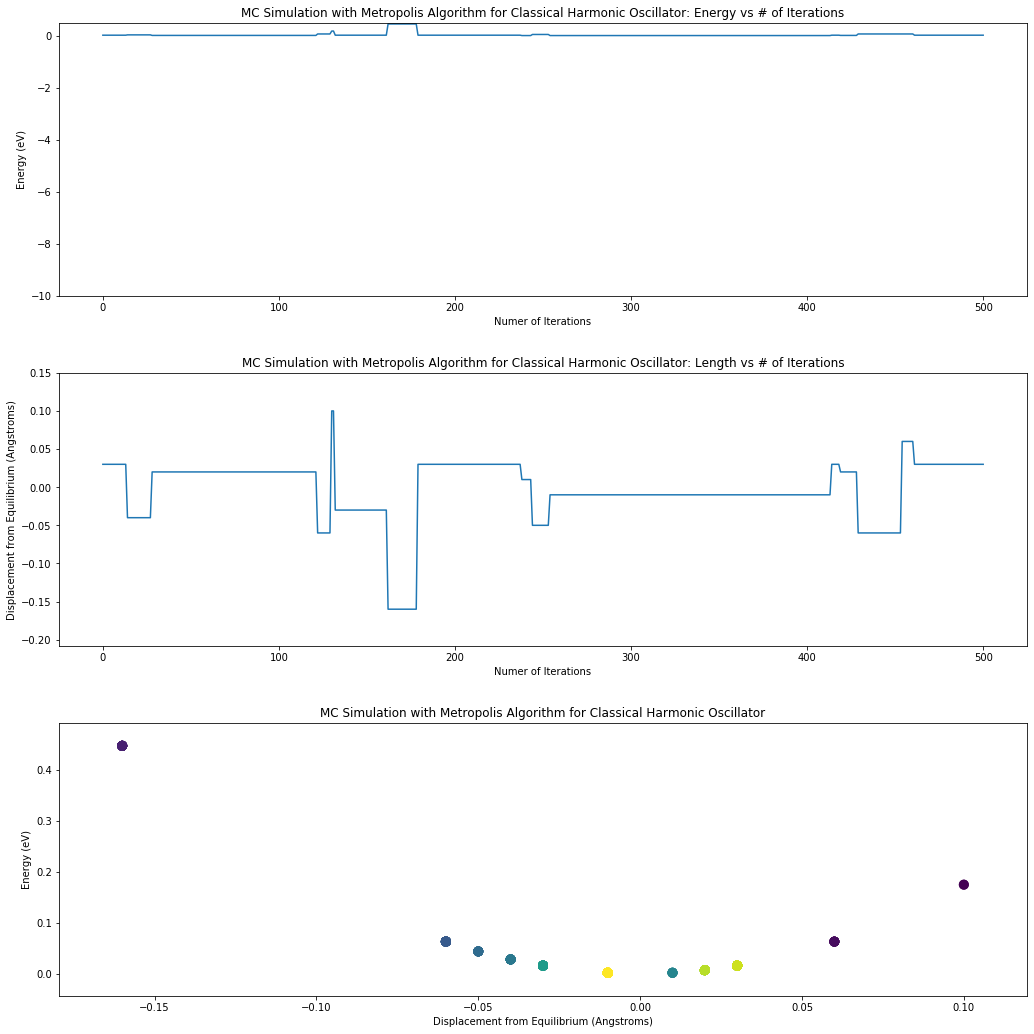

In [23]:
#Analysis of data - plots
length = df['Length (Angstrom)'].to_numpy()
energy = df['Energy (eV)'].to_numpy()
iterations = np.arange(0,n+1,1)

fig, axs = plt.subplots(3, 1, figsize=(15, 15), sharey=False)

axs[0].plot(iterations, energy)
axs[0].set_ylim(-10, (np.amax(energy))*1.1)
axs[0].set_ylabel("Energy (eV)")
axs[0].set_xlabel("Numer of Iterations")
axs[0].set_title("MC Simulation with Metropolis Algorithm for Classical Harmonic Oscillator: Energy vs # of Iterations")

axs[1].plot(iterations, length)
axs[1].set_ylim(min((np.amax(length))*-.5, 1.3*np.amin(length)), (np.amax(length))*1.5)
axs[1].set_ylabel("Displacement from Equilibrium (Angstroms)")
axs[1].set_xlabel("Numer of Iterations")
axs[1].set_title("MC Simulation with Metropolis Algorithm for Classical Harmonic Oscillator: Length vs # of Iterations")

#The code below colors the density of data points on graph: 
#- dark blue means less dense (few iterations at this energy level and bond length) 
#- yellow to red means more dense (more iterations at this energy level and bond length)
xy = np.vstack([length,energy])
z = gaussian_kde(xy)(xy)

axs[2].scatter(length, energy, c=z, s=100, edgecolor='')
axs[2].set_xlabel("Displacement from Equilibrium (Angstroms)")
axs[2].set_ylabel("Energy (eV)")
axs[2].set_title("MC Simulation with Metropolis Algorithm for Classical Harmonic Oscillator")

fig.tight_layout(pad=3.0)


In [24]:
#Analysis of data - averages 
avg = df.mean(axis = 0)
print(avg)

Length (Angstrom)   -0.003912
Energy (eV)          0.029218
dtype: float64


In [26]:
print(df.to_string())

     Length (Angstrom)  Energy (eV)
0                 0.03     0.015721
1                 0.03     0.015721
2                 0.03     0.015721
3                 0.03     0.015721
4                 0.03     0.015721
5                 0.03     0.015721
6                 0.03     0.015721
7                 0.03     0.015721
8                 0.03     0.015721
9                 0.03     0.015721
10                0.03     0.015721
11                0.03     0.015721
12                0.03     0.015721
13                0.03     0.015721
14               -0.04     0.027949
15               -0.04     0.027949
16               -0.04     0.027949
17               -0.04     0.027949
18               -0.04     0.027949
19               -0.04     0.027949
20               -0.04     0.027949
21               -0.04     0.027949
22               -0.04     0.027949
23               -0.04     0.027949
24               -0.04     0.027949
25               -0.04     0.027949
26               -0.04     0